# Imports


In [7]:
%load_ext autoreload
%autoreload 2
import os

while not os.getcwd().endswith("dynamic-clustering"):
    os.chdir("..")
    print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
from scripts.clusterer import CluStream
from scripts.dynamic_clusterer import DynamicClusterer
from scripts.utils import get_colors, clean_directory

from river import drift

In [9]:
colors = get_colors()


def import_and_shuffle_csv(file_path):
    final_2d_data = np.loadtxt(file_path, delimiter=",")

    reference_data = final_2d_data[:1000]
    np.random.shuffle(reference_data)

    batch1 = final_2d_data[1000:1200]
    np.random.shuffle(batch1)

    batch2 = final_2d_data[1200:1400]
    np.random.shuffle(batch2)

    batch3 = final_2d_data[1400:1600]
    np.random.shuffle(batch3)

    batch4 = final_2d_data[1600:1800]
    np.random.shuffle(batch4)

    batch5 = final_2d_data[1800:2000]
    np.random.shuffle(batch5)

    return reference_data, [batch1, batch2, batch3, batch4, batch5]

number of colors defined: 20


In [10]:
# file_path, drift_type = "./data/final_2d_data_brightness.csv", "BRIGHTNESS"
# file_path, drift_type = './data/final_2d_data_contrast.csv', 'CONTRAST'
file_path, drift_type = "./data/final_2d_data_saturation.csv", "SATURATION"
# file_path, drift_type = './data/final_2d_data_gaussian_noise.csv', 'GAUSSIAN_NOISE'
reference_data, batches = import_and_shuffle_csv(file_path)

full_prod_data = np.concatenate(batches, axis=0)

ids = []

In [11]:
def init_dynamic_clusterer(data=reference_data, threshold=5):
    clustream_model = CluStream(
        max_micro_clusters=200,
        time_window=100,
        seed=0,
    )
    drift_detector = drift.PageHinkley(delta=0.0005, threshold=threshold)

    dynamic_clusterer = DynamicClusterer(
        data,
        clustream_model,
        drift_detector,
        colors,
        x_limits=(-10, 20),
        y_limits=(0, 15),
    )

    return dynamic_clusterer

New model created - id: 30761
(id: 0 - cen: [1.24 8.09] - rad: 1.17)
(id: 1 - cen: [1.88 4.19] - rad: 1.19)
<!> Change detected! Possible input drift at timestamp 5 ----> Apply macroclustering <!>



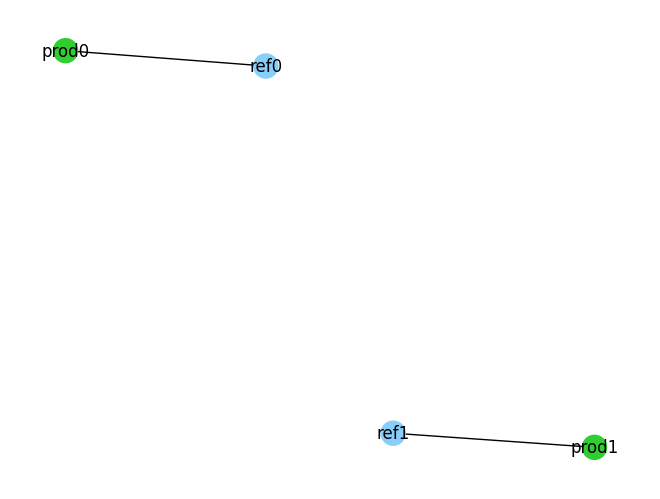

(id: 0 - cen: [1.24 8.09] - rad: 1.17) SURVIVED as (id: 0 - cen: [1.35 8.06] - rad: 1.25) (score: 0.9676209021896462)
(id: 1 - cen: [1.88 4.19] - rad: 1.19) SURVIVED as (id: 1 - cen: [1.96 4.17] - rad: 1.23) (score: 0.9759527420707508)
Final macroclusters:
(id: 0 - cen: [1.35 8.06] - rad: 1.25)
(id: 1 - cen: [1.96 4.17] - rad: 1.23)

-----------------------------------------------------------------------------------



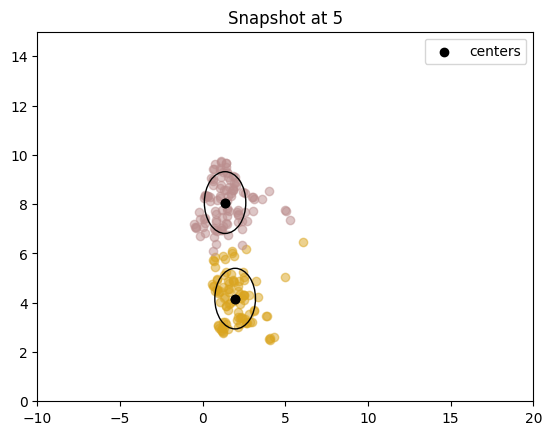

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 47 ----> Apply macroclustering <!>



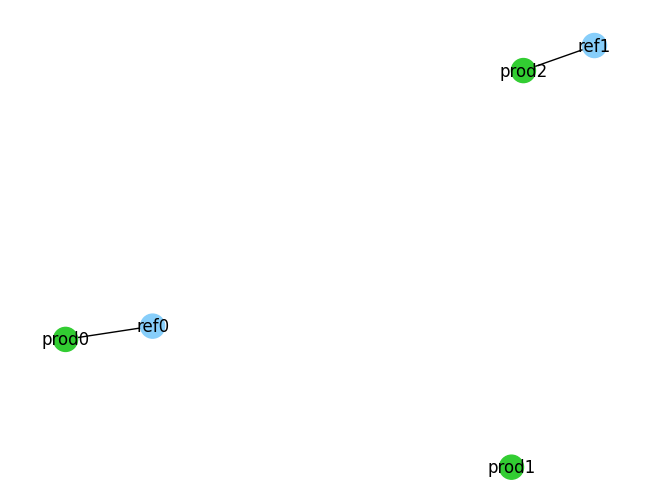

(id: 0 - cen: [1.35 8.06] - rad: 1.25) SURVIVED as (id: 0 - cen: [1.32 8.  ] - rad: 1.27) (score: 0.980819372655774)
(!) (id: 2 - cen: [5.28 5.83] - rad: 1.73) APPEARED --- (score: 0.5804687099608062)
(id: 1 - cen: [1.96 4.17] - rad: 1.23) SURVIVED as (id: 1 - cen: [2.07 3.89] - rad: 1.19) (score: 0.9180524592087553)
Final macroclusters:
(id: 0 - cen: [1.32 8.  ] - rad: 1.27)
(id: 1 - cen: [2.07 3.89] - rad: 1.19)
(id: 2 - cen: [5.28 5.83] - rad: 1.73)

-----------------------------------------------------------------------------------



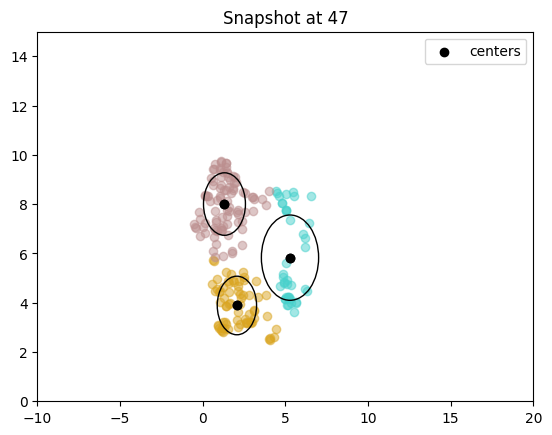

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 188 ----> Apply macroclustering <!>



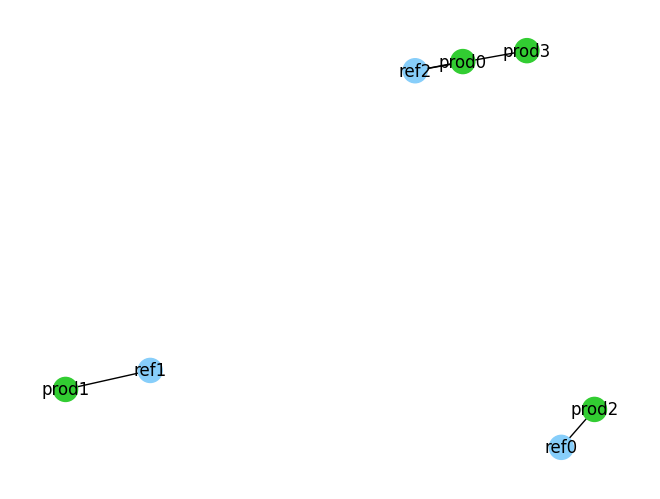

(id: 2 - cen: [5.28 5.83] - rad: 1.73) SURVIVED as (id: 2 - cen: [5.25 7.84] - rad: 1.07) (score: 0.6072131601330656)
(id: 1 - cen: [2.07 3.89] - rad: 1.19) SURVIVED as (id: 1 - cen: [1.81 4.03] - rad: 1.07) (score: 0.9126534736508054)
(id: 0 - cen: [1.32 8.  ] - rad: 1.27) SURVIVED as (id: 0 - cen: [1.26 8.08] - rad: 1.24) (score: 0.9739361526668577)
(!) (id: 2 - cen: [5.28 5.83] - rad: 1.73) SURVIVED as (id: 3 - cen: [5.08 4.61] - rad: 0.88) but a SPLITTING is needed (score: 0.7215539027838542)
Final macroclusters:
(id: 0 - cen: [1.26 8.08] - rad: 1.24)
(id: 1 - cen: [1.81 4.03] - rad: 1.07)
(id: 2 - cen: [5.25 7.84] - rad: 1.07)
(id: 3 - cen: [5.08 4.61] - rad: 0.88)

-----------------------------------------------------------------------------------



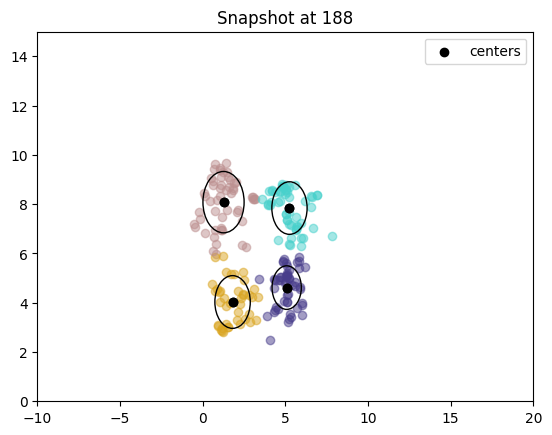

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 436 ----> Apply macroclustering <!>



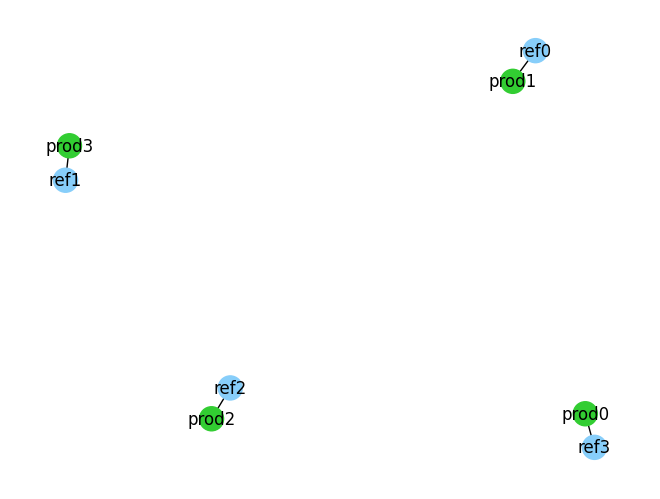

(id: 3 - cen: [5.08 4.61] - rad: 0.88) SURVIVED as (id: 3 - cen: [5.61 4.75] - rad: 0.86) (score: 0.8042863418567618)
(id: 0 - cen: [1.26 8.08] - rad: 1.24) SURVIVED as (id: 0 - cen: [1.21 8.17] - rad: 1.16) (score: 0.9723961349820668)
(id: 2 - cen: [5.25 7.84] - rad: 1.07) SURVIVED as (id: 2 - cen: [5.78 7.73] - rad: 0.95) (score: 0.8298435943511734)
(id: 1 - cen: [1.81 4.03] - rad: 1.07) SURVIVED as (id: 1 - cen: [1.79 3.94] - rad: 1.13) (score: 0.9706352969416273)
Final macroclusters:
(id: 0 - cen: [1.21 8.17] - rad: 1.16)
(id: 1 - cen: [1.79 3.94] - rad: 1.13)
(id: 2 - cen: [5.78 7.73] - rad: 0.95)
(id: 3 - cen: [5.61 4.75] - rad: 0.86)

-----------------------------------------------------------------------------------



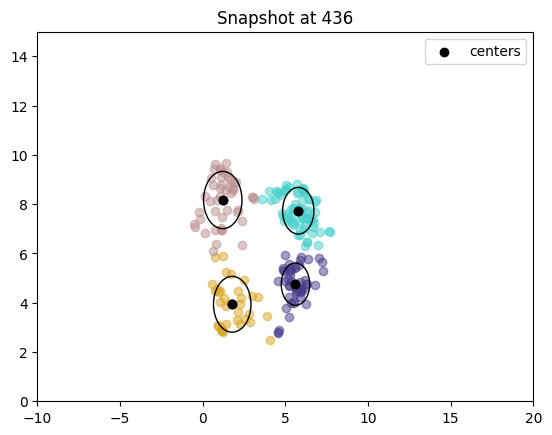

<Figure size 1000x1000 with 0 Axes>

<!> Change detected! Possible input drift at timestamp 805 ----> Apply macroclustering <!>



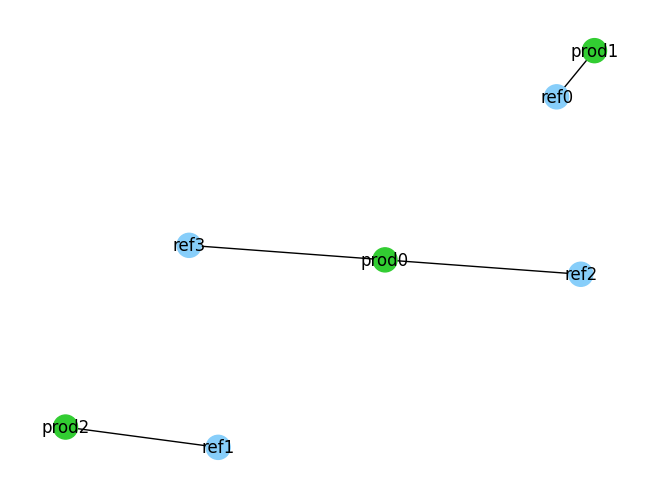

(!) [2, 3] are MERGED in (id: 4 - cen: [6.51 6.39] - rad: 1.34) (overlapping scores: [np.float64(0.6300811812350924), np.float64(0.5543381336135319)])
(id: 0 - cen: [1.21 8.17] - rad: 1.16) SURVIVED as (id: 0 - cen: [1.34 8.05] - rad: 1.3) (score: 0.9533078049452516)
(id: 1 - cen: [1.79 3.94] - rad: 1.13) SURVIVED as (id: 1 - cen: [2.11 3.76] - rad: 1.26) (score: 0.8989046964495169)
Final macroclusters:
(id: 0 - cen: [1.34 8.05] - rad: 1.3)
(id: 1 - cen: [2.11 3.76] - rad: 1.26)
(id: 4 - cen: [6.51 6.39] - rad: 1.34)

-----------------------------------------------------------------------------------



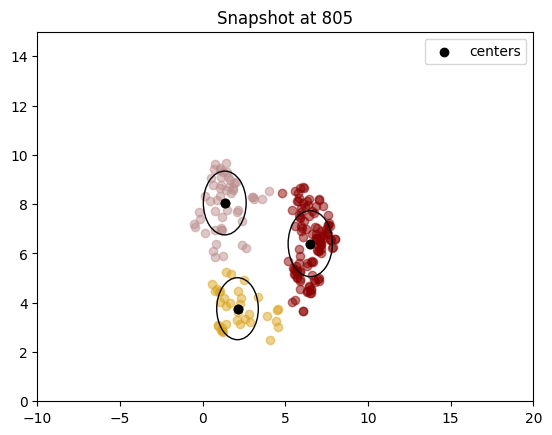

<Figure size 1000x1000 with 0 Axes>

Batch Finished ----> Apply macroclustering



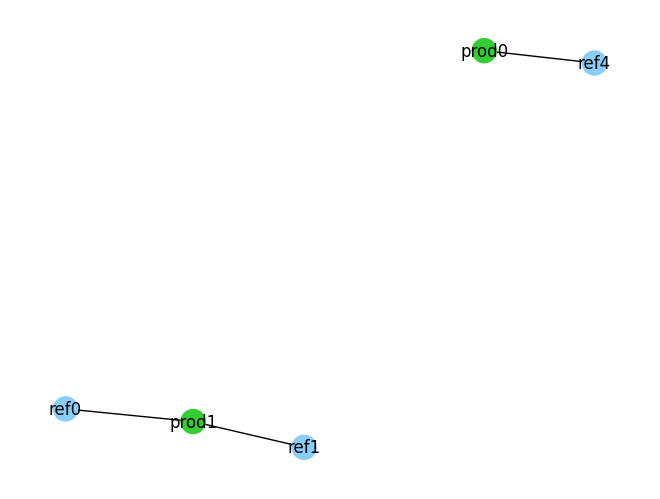

(id: 4 - cen: [6.51 6.39] - rad: 1.34) SURVIVED as (id: 4 - cen: [6.54 6.21] - rad: 1.44) (score: 0.9554088928084227)
(!) [0, 1] are MERGED in (id: 2 - cen: [1.45 6.56] - rad: 2.25) (overlapping scores: [np.float64(0.7470815846246233), np.float64(0.5654000700283146)])
Final macroclusters:
(id: 4 - cen: [6.54 6.21] - rad: 1.44)
(id: 2 - cen: [1.45 6.56] - rad: 2.25)

-----------------------------------------------------------------------------------



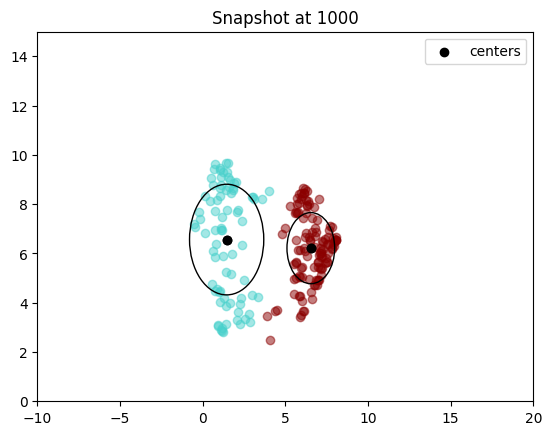

<Figure size 1000x1000 with 0 Axes>

In [12]:
clustream = init_dynamic_clusterer()

id = clustream.get_id()
ids.append(id)

clustream.receive_prod(full_prod_data)
clustream.fit_prod_data(plot_img=True, print_graph=True, macroclustering_at_end=True)

# clustream.draw_snapshots()
clustream.draw_gif(title=drift_type)

In [13]:
# Clean directory

for id in ids:
    ids.remove(id)
    clean_directory(f"./plots/{id}")
    print(f"Deleted {id}")


Directory './plots/30761' and its contents removed successfully.
Deleted 30761
